# Import libs

In [67]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from utils import correlation_matrix

# Parameters

In [68]:
threshold = 0.7
label = True # Fasle for correlation without label
data_path = "../data/data_updated.csv"

# Read data and split data

In [69]:
data = pd.read_csv(data_path)
print(data.columns.tolist())

['No.', 'Full Name', 'Sample ID', 'Status', 'Age', 'Gender', 'Birth year', 'Gioi tinh', 'Abs Lympho', '% CD3', 'Abs CD3', '% CD4', 'Abs CD4', '% CD8', 'Abs CD8', '%CD19', 'Abs CD19', '% CD56', 'Abs CD56', 'Abs mono', '4/8 ratio', 'MNC', 'Lympho.2', 'Mono', 'Mono, CD14+ HLA_DR+', 'mono, CD14+ CD64+', 'B cells.2', 'T cells.2', 'CD56+ T cells', 'NK cells', 'CD16+ CD56dim', 'Lympho.3', 'B cells.3', 'CD21low_CD38low', 'Transitional', 'plasmablasts', 'Plasmacells', 'Class-switched', 'non-switched', 'Q1_ naive', 'Q1_ memory', 'Q1_ immature', 'Q1_ CD21 low', 'Lympho.4', 'NK cells.1', 'T cells.4', 'TCD4+', 'TCD8+', 'Treg', 'CD4, CD28 neg', 'NK, CD62L+', 'NK, CD197+', 'CD8, CD28 neg', 'CD4- CD8-', 'CD4, CD45RA-CD62L+', 'CD4, CD45RA+ CD62L+', 'CD4, CD45RA-CD62L-', 'CD4, CD45RA+ CD62L-', 'CD8, CD45RA-CD62L+', 'CD8, CD45RA+ CD62L+', 'CD8, CD45RA-CD62L-', 'CD8, CD45RA+ CD62L-', 'CD4, CD45RA-CD197+', 'CD4, CD45RA+CD197+', 'CD4, CD45RA-CD197-', 'CD4, CD45RA+CD197-', 'CD8, CD45RA-CD197+', 'CD8, CD45RA+

In [55]:
data_heal = data[data["Status"] == "Normal"]
data_sepsis = data[data["Status"] == "Sepsis"]

In [56]:
data = data_heal.append(data_sepsis)

C:\Users\thien\AppData\Local\Temp\ipykernel_8704\245306693.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data_heal.append(data_sepsis)


In [57]:
data.head()

,No.,Full Name,Sample ID,Status,Age,Gender,Birth year,Gioi tinh,Abs Lympho,% CD3,...,CD244_2B4 APC-A Median,NKp30 BV605-A Median,CD314_ NKG2D BV510- A Median,PBMNCs (10^6),05:01,10:01,20:01,40:01:00,cell split,label
0,1,Bùi Việt Anh,VU.HT.07,Normal,44,0,1978,Nam,7386,51.57,...,854,35,958,50.0,36,59,74,88,5,0
1,2,Đàm Thị Minh Phương,VU.HT.11,Normal,40,1,1982,Nữ,1879,79.53,...,542,58,556,24.0,7,7,11,14,1,0
2,3,Nguyễn Thành Luân,VU.HT.03,Normal,33,0,1989,Nam,2361,64.32,...,526,32,542,27.0,12,22,41,71,5,0
3,4,Nguyễn Thị Thanh Mai,VU.HT.09,Normal,63,1,1959,Nữ,2025,65.38,...,759,23,549,21.0,16,7,30,55,5,0
4,5,Nguyễn Thị Tuyết Anh,VU.HT.01,Normal,28,1,1994,Nữ,1311,70.89,...,465,128,482,16.0,23,29,53,75,7,0


In [58]:
data.columns[20:40]

Index(['4/8 ratio', 'MNC', 'Lympho', 'Mono', 'Mono, CD14+ HLA_DR+',
       'mono, CD14+ CD64+', 'B cells', 'T cells', 'CD56+ T cells', 'NK cells',
       'CD16+ CD56dim', 'Lympho.1', 'B cells.1', 'CD21low_CD38low',
       'Transitional', 'plasmablasts', 'Plasmacells', 'Class-switched',
       'non-switched', 'Q1_ naive'],
      dtype='object')

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 100
Columns: 104 entries, No. to label
dtypes: float64(77), int64(23), object(4)
memory usage: 57.4+ KB


# Visualization data

In [7]:
data = data.drop(columns=['No.', 'Full Name', 'Sample ID', 'Birth year', 'Gioi tinh', 'label'])

In [8]:
data.head()

,Status,Age,Gender,Abs Lympho,% CD3,Abs CD3,% CD4,Abs CD4,% CD8,Abs CD8,...,Nkp46 PE-Cy7-A Median,CD244_2B4 APC-A Median,NKp30 BV605-A Median,CD314_ NKG2D BV510- A Median,PBMNCs (10^6),05:01,10:01,20:01,40:01:00,cell split
0,Normal,44,0,7386,51.57,3809,31.84,2352,18.00,1329,...,100,854,35,958,50.0,36,59,74,88,5
1,Normal,40,1,1879,79.53,1494,45.50,855,32.73,615,...,640,542,58,556,24.0,7,7,11,14,1
2,Normal,33,0,2361,64.32,1519,35.84,846,23.92,565,...,214,526,32,542,27.0,12,22,41,71,5
3,Normal,63,1,2025,65.38,1324,41.95,850,19.35,392,...,160,759,23,549,21.0,16,7,30,55,5
4,Normal,28,1,1311,70.89,930,53.62,703,13.29,174,...,867,465,128,482,16.0,23,29,53,75,7


In [37]:
data1 = data[list(data.columns[3:16]) + ['Status']] # Abs + %
data2 = data[list(data.columns[16:26]) + ['Status']] # % positive
data3 = data[list(data.columns[26:38]) + ['Status']] # % cell
data4 = data[list(data.columns[38:65]) + ['Status']] # % cell
data5 = data[list(data.columns[65:80]) + ['Status']] # % cell
data345 = data[list(data.columns[26:80]) + ['Status']] # % cell
data6 = data[list(data.columns[80:92]) + ['Status']] # MFI
data7 = data[list(data.columns[92:98]) + ['Status']]

In [39]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 100
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Lympho.4                      70 non-null     float64
 1   NK cell                       70 non-null     float64
 2   T cells.2                     70 non-null     float64
 3   T, 2B4+                       70 non-null     float64
 4   T, DNAM+                      70 non-null     float64
 5   T, NKG2D+                     70 non-null     float64
 6   DNAM-1 FITC-A Median          70 non-null     int64  
 7   Nkp44 PE-A Median             70 non-null     int64  
 8   Nkp46 PE-Cy7-A Median         70 non-null     int64  
 9   CD244_2B4 APC-A Median        70 non-null     int64  
 10  NKp30 BV605-A Median          70 non-null     int64  
 11  CD314_ NKG2D BV510- A Median  70 non-null     int64  
 12  Status                        70 non-null     object 
dtypes: flo

## Data 1

In [10]:
data1.columns

Index(['Abs Lympho', '% CD3', 'Abs CD3', '% CD4', 'Abs CD4', '% CD8',
       'Abs CD8', '%CD19', 'Abs CD19', '% CD56', 'Abs CD56', 'Abs mono',
       '4/8 ratio', 'MNC', 'Status'],
      dtype='object')

In [11]:
per_cols_data1 = ['% CD3', '% CD4', '% CD8', '%CD19', '% CD56', '4/8 ratio', 'Status', 'Abs mono']
other_cols_data1 = list(data1.columns.drop(per_cols_data1)) + ['Status']

In [12]:
data1_melt_per = pd.melt(data1[per_cols_data1], id_vars="Status",
               var_name="features",
               value_name="value (%)")

data1_melt_other = pd.melt(data1[other_cols_data1], id_vars="Status",
               var_name="features",
               value_name="value (abs)")

In [27]:
data1_melt_other

,Status,features,value (abs)
0,Normal,Abs Lympho,7386
1,Normal,Abs Lympho,1879
2,Normal,Abs Lympho,2361
3,Normal,Abs Lympho,2025
4,Normal,Abs Lympho,1311
...,...,...,...
415,Sepsis,Abs CD56,267
416,Sepsis,Abs CD56,21
417,Sepsis,Abs CD56,128
418,Sepsis,Abs CD56,80


C:\Users\thien\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


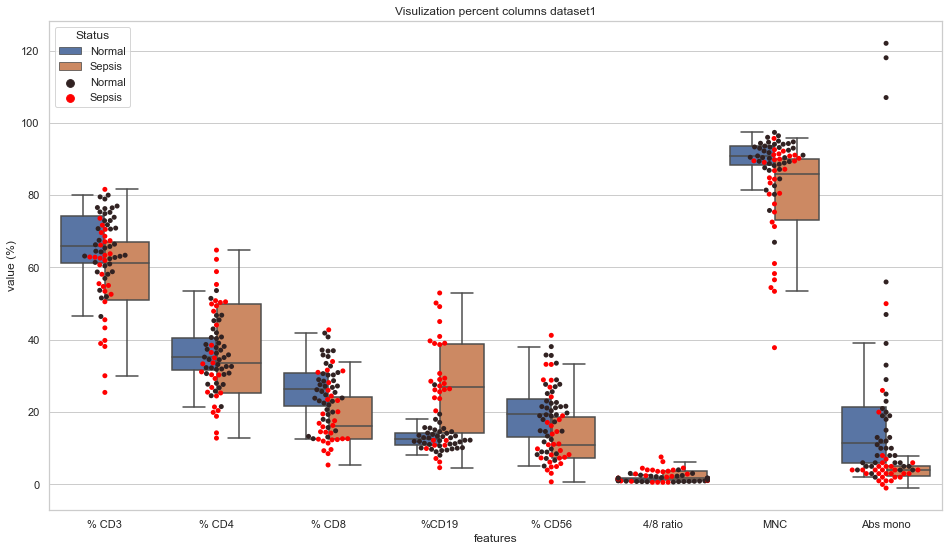

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(16,9))
sns.set(style="whitegrid")

plt.title("Visulization percent columns dataset1")

ax = sns.boxplot(x="features", y="value (%)", hue='Status',data = data1_melt_per, showfliers = False)
ax = sns.swarmplot(x="features", y="value (%)", hue='Status', data=data1_melt_per, color="red")

plt.show()
plt.savefig("../plots/task3/visualization/boxplot/data1_percent_col.png")

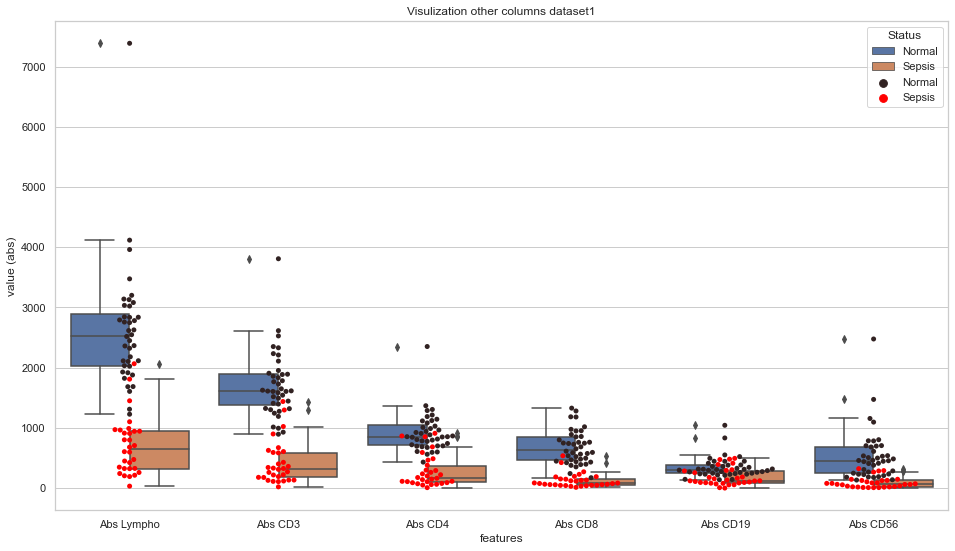

<Figure size 432x288 with 0 Axes>

In [28]:
plt.figure(figsize=(16,9))
sns.set(style="whitegrid")
plt.title("Visulization other columns dataset1")

ax = sns.boxplot(x="features", y="value (abs)", hue="Status", data = data1_melt_other, showfliers = True)
ax = sns.swarmplot(x="features", y="value (abs)", hue="Status", data=data1_melt_other, color="red")

plt.show()
plt.savefig("../plots/task3/visualization/boxplot/data1_other_cols.png")

## Data 2

In [15]:
data2_melt = pd.melt(data2, id_vars="Status",
               var_name="features",
               value_name="value (%)")

C:\Users\thien\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


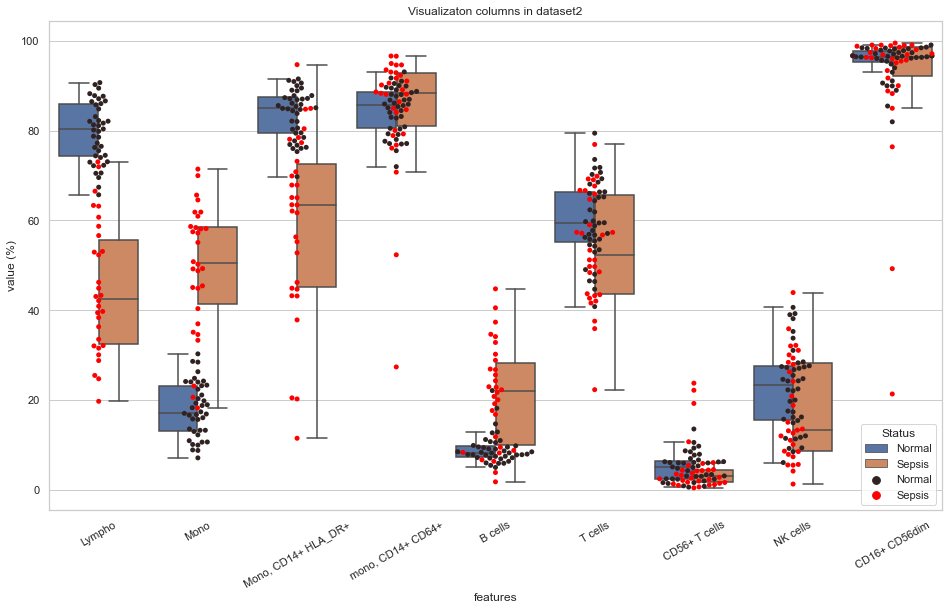

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize=(16,9))
sns.set(style="whitegrid")

plt.title("Visualizaton columns in dataset2")

ax = sns.boxplot(x="features", y="value (%)", hue='Status',data = data2_melt, showfliers = False)
ax = sns.swarmplot(x="features", y="value (%)", hue='Status', data=data2_melt, color="red")

plt.xticks(rotation=30)
plt.show()
plt.savefig("../plots/task3/visualization/boxplot/data2.png")

## Data3 - Data5

In [17]:
data345_melt = pd.melt(data345, id_vars="Status",
               var_name="features",
               value_name="value (%)")

C:\Users\thien\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.1% of the points 

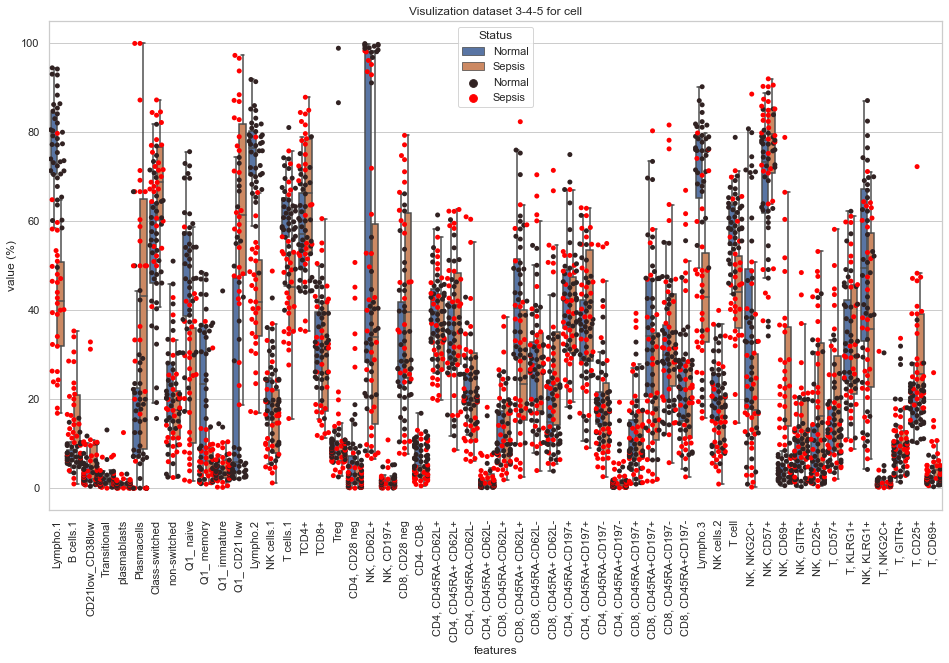

In [18]:
plt.figure(figsize=(16,9))
sns.set(style="whitegrid")

plt.title("Visulization dataset 3-4-5 for cell")

ax = sns.boxplot(x="features", y="value (%)", hue='Status',data = data345_melt, showfliers = False)
ax = sns.swarmplot(x="features", y="value (%)", hue='Status', data=data345_melt, color="red")


plt.xticks(rotation=90)
plt.savefig("../plots/task3/visualization/boxplot/data345.png")

# Data 6

In [19]:
median_cols_data6 = ['DNAM-1 FITC-A Median', 'Nkp44 PE-A Median', 'Nkp46 PE-Cy7-A Median',
       'CD244_2B4 APC-A Median', 'NKp30 BV605-A Median',
       'CD314_ NKG2D BV510- A Median',]
other_cols_data6 = data6.columns.drop(median_cols_data6)

In [20]:
data6_median_cols = pd.melt(data6[list(median_cols_data6) + ['Status']], id_vars="Status",
               var_name="features",
               value_name="value (MFI)")

data6_other_cols = pd.melt(data6[other_cols_data6], id_vars="Status",
               var_name="features",
               value_name="value (MFI)")

C:\Users\thien\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


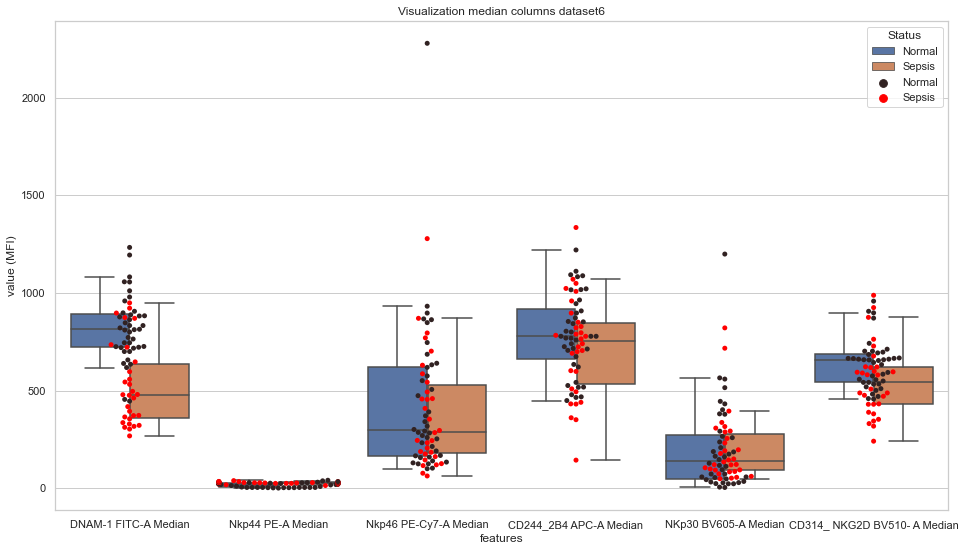

In [21]:
plt.figure(figsize=(16,9))
sns.set(style="whitegrid")

plt.title("Visualization median columns dataset6")

ax = sns.boxplot(x="features", y="value (MFI)", hue='Status',data = data6_median_cols, showfliers = False)
ax = sns.swarmplot(x="features", y="value (MFI)", hue='Status', data=data6_median_cols, color="red")

plt.savefig("../plots/task3/visualization/boxplot/data6_median_cols.png")

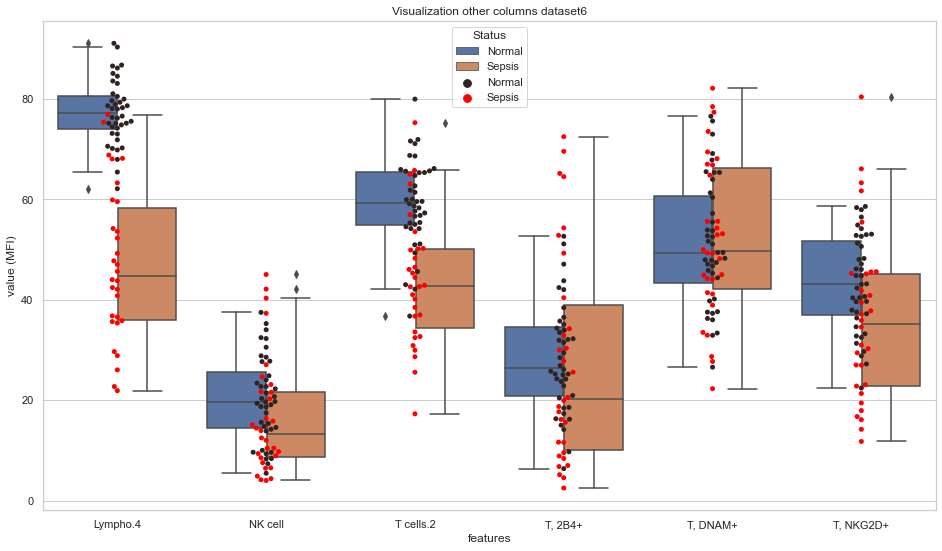

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(16,9))
sns.set(style="whitegrid")

plt.title("Visualization other columns dataset6")

ax = sns.boxplot(x="features", y="value (MFI)", hue='Status', data = data6_other_cols, showfliers = True)
ax = sns.swarmplot(x="features", y="value (MFI)", hue='Status', data=data6_other_cols, color="red")

plt.show()
plt.savefig("../plots/task3/visualization/boxplot/data6_median_cols.png")

## Data 7

In [23]:
data7_melt = pd.melt(data7, id_vars="Status",
               var_name="features",
               value_name="value")

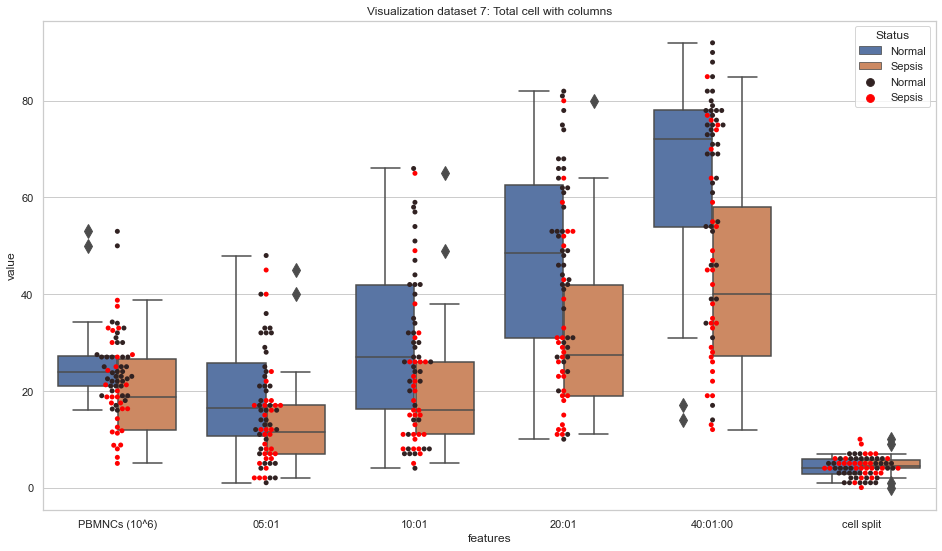

In [24]:
plt.figure(figsize=(16,9))
sns.set(style="whitegrid")

plt.title("Visualization dataset 7: Total cell with columns")

ax = sns.boxplot(x="features", y="value", hue='Status',data = data7_melt, showfliers = True, fliersize=10)
ax = sns.swarmplot(x="features", y="value", hue='Status', data=data7_melt, color="red")



plt.savefig("../plots/task3/visualization/boxplot/data7.png")